
Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [97]:
# Import relevant libraries
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve
from plotnine import *

In [98]:
# Read in dataset
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [99]:
# Drop NA's and dummify categorical variables (except "species" since that is the target variable)
penguins = penguins.dropna()
penguins = pd.get_dummies(penguins, columns=["year", "island", "sex"]) # I am including year because I want to treat it as categorical

# Let's change the boolean true/false outputs to 0's for false and 1's for true
new_columns = ["year_2007", "year_2008", "year_2009", "island_Biscoe", "island_Dream", "island_Torgersen", "sex_female", "sex_male"]
penguins[new_columns] = penguins[new_columns].astype(int)
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year_2007,year_2008,year_2009,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [100]:
# Set predictor and target variables
y = penguins["species"]
X = penguins.drop("species", axis = 1)

In [101]:
# kNN model (K=5)
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]) # a dummifying step is not needed here since the categorical variables have already been dummified
  ],
  remainder = "passthrough"
)

knn_classification_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_classification", KNeighborsClassifier(n_neighbors=5))]
)

# Fit on entire dataset
knn_classification_pipeline_fitted = knn_classification_pipeline.fit(X, y)
y_preds_knn = knn_classification_pipeline_fitted.predict(X)

In [102]:
# kNN model (K=20)
knn_classification_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn_classification", KNeighborsClassifier(n_neighbors=20))]
)

# Fit on entire dataset
knn_classification_pipeline_2_fitted = knn_classification_pipeline_2.fit(X, y)
y_preds_knn_2 = knn_classification_pipeline_2_fitted.predict(X)

In [103]:
# Decision tree model (min_impurity_decrease=0.01)
dt_classification_pipeline = Pipeline(
  [("preprocessing", ct),
  ("dt_classification", DecisionTreeClassifier(min_impurity_decrease=0.01))]
)

In [104]:
# Decision tree model (min_impurity_decrease=0.1)
dt_classification_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("dt_classification", DecisionTreeClassifier(min_impurity_decrease=0.1))]
)

In [105]:
# Create training and test data (include stratifying the target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# kNN model (K=5)

In [106]:
# Confusion matrix for kNN model (K=5)
knn_classification_pipeline_fitted = knn_classification_pipeline.fit(X_train, y_train)
y_preds_knn = knn_classification_pipeline_fitted.predict(X_test)

confusion_matrix(y_test, y_preds_knn)

array([[28,  1,  0],
       [ 1, 13,  0],
       [ 0,  0, 24]])

In [107]:
# Overall accuracy
accuracy_score(y_test, y_preds_knn)

0.9701492537313433

In [108]:
# Precision, Recall, AUC, and F1-score for Adelie
print("Precision score:", precision_score(y_test == "Adelie", y_preds_knn == "Adelie", average = "binary"))
print("Recall score:", recall_score(y_test == "Adelie", y_preds_knn == "Adelie", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Adelie", y_preds_knn == "Adelie", average = "macro"))
print("F1 score:", f1_score(y_test == "Adelie", y_preds_knn == "Adelie", average = "binary"))

Precision score: 0.9655172413793104
Recall score: 0.9655172413793104
AUC: 0.9696007259528131
F1 score: 0.9655172413793104
Precision score: 0.9655172413793104
Recall score: 0.9655172413793104
AUC: 0.9696007259528131
F1 score: 0.9655172413793104


In [109]:
# Precision, Recall, AUC, and F1-score for Chinstrap
print("Precision score:", precision_score(y_test == "Chinstrap", y_preds_knn == "Chinstrap", average = "binary"))
print("Recall score:", recall_score(y_test == "Chinstrap", y_preds_knn == "Chinstrap", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Chinstrap", y_preds_knn == "Chinstrap", average = "macro"))
print("F1 score:", f1_score(y_test == "Chinstrap", y_preds_knn == "Chinstrap", average = "binary"))

Precision score: 0.9285714285714286
Recall score: 0.9285714285714286
AUC: 0.9548517520215634
F1 score: 0.9285714285714286
Precision score: 0.9285714285714286
Recall score: 0.9285714285714286
AUC: 0.9548517520215634
F1 score: 0.9285714285714286


In [110]:
# Precision, Recall, AUC, and F1-score for Gentoo
print("Precision score:", precision_score(y_test == "Gentoo", y_preds_knn == "Gentoo", average = "binary"))
print("Recall score:", recall_score(y_test == "Gentoo", y_preds_knn == "Gentoo", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Gentoo", y_preds_knn == "Gentoo", average = "macro"))
print("F1 score:", f1_score(y_test == "Gentoo", y_preds_knn == "Gentoo", average = "binary"))

Precision score: 1.0
Recall score: 1.0
AUC: 1.0
F1 score: 1.0
Precision score: 1.0
Recall score: 1.0
AUC: 1.0
F1 score: 1.0


# kNN Model (K=20)

In [111]:
# Confusion matrix for kNN model (K=20)
knn_classification_pipeline_2_fitted = knn_classification_pipeline_2.fit(X_train, y_train)
y_preds_knn_2 = knn_classification_pipeline_2_fitted.predict(X_test)

confusion_matrix(y_test, y_preds_knn_2)

array([[29,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 24]])

In [112]:
# Overall accuracy
accuracy_score(y_test, y_preds_knn_2)

1.0

In [113]:
# Precision, Recall, AUC, and F1-score for Adelie
print("Precision score:", precision_score(y_test == "Adelie", y_preds_knn_2 == "Adelie", average = "binary"))
print("Recall score:", recall_score(y_test == "Adelie", y_preds_knn_2 == "Adelie", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Adelie", y_preds_knn_2 == "Adelie", average = "macro"))
print("F1 score:", f1_score(y_test == "Adelie", y_preds_knn_2 == "Adelie", average = "binary"))

Precision score: 1.0
Recall score: 1.0
AUC: 1.0
F1 score: 1.0
Precision score: 1.0
Recall score: 1.0
AUC: 1.0
F1 score: 1.0


In [114]:
# Precision, Recall, AUC, and F1-score for Chinstrap
print("Precision score:", precision_score(y_test == "Chinstrap", y_preds_knn_2 == "Chinstrap", average = "binary"))
print("Recall score:", recall_score(y_test == "Chinstrap", y_preds_knn_2 == "Chinstrap", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Chinstrap", y_preds_knn_2 == "Chinstrap", average = "macro"))
print("F1 score:", f1_score(y_test == "Chinstrap", y_preds_knn_2 == "Chinstrap", average = "binary"))

Precision score: 1.0
Recall score: 1.0
AUC: 1.0
F1 score: 1.0
Precision score: 1.0
Recall score: 1.0
AUC: 1.0
F1 score: 1.0


In [115]:
# Precision, Recall, AUC, and F1-score for Gentoo
print("Precision score:", precision_score(y_test == "Gentoo", y_preds_knn_2 == "Gentoo", average = "binary"))
print("Recall score:", recall_score(y_test == "Gentoo", y_preds_knn_2 == "Gentoo", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Gentoo", y_preds_knn_2 == "Gentoo", average = "macro"))
print("F1 score:", f1_score(y_test == "Gentoo", y_preds_knn_2 == "Gentoo", average = "binary"))

Precision score: 1.0
Recall score: 1.0
AUC: 1.0
F1 score: 1.0
Precision score: 1.0
Recall score: 1.0
AUC: 1.0
F1 score: 1.0


# Decision tree model (min_impurity_decrease=0.01)

In [116]:
# Confusion matrix
dt_classification_pipeline_fitted = dt_classification_pipeline.fit(X_train, y_train)
y_preds_dt = dt_classification_pipeline_fitted.predict(X_test)

confusion_matrix(y_test, y_preds_dt)

array([[29,  0,  0],
       [ 1, 13,  0],
       [ 2,  0, 22]])

In [117]:
# Overall accuracy
accuracy_score(y_test, y_preds_dt)

0.9552238805970149

In [118]:
# Precision, Recall, AUC, and F1-score for Adelie
print("Precision score:", precision_score(y_test == "Adelie", y_preds_dt == "Adelie", average = "binary"))
print("Recall score:", recall_score(y_test == "Adelie", y_preds_dt == "Adelie", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Adelie", y_preds_dt == "Adelie", average = "macro"))
print("F1 score:", f1_score(y_test == "Adelie", y_preds_dt == "Adelie", average = "binary"))

Precision score: 0.90625
Recall score: 1.0
AUC: 0.9605263157894737
F1 score: 0.9508196721311475
Precision score: 0.90625
Recall score: 1.0
AUC: 0.9605263157894737
F1 score: 0.9508196721311475


In [119]:
# Precision, Recall, AUC, and F1-score for Chinstrap
print("Precision score:", precision_score(y_test == "Chinstrap", y_preds_dt == "Chinstrap", average = "binary"))
print("Recall score:", recall_score(y_test == "Chinstrap", y_preds_dt == "Chinstrap", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Chinstrap", y_preds_dt == "Chinstrap", average = "macro"))
print("F1 score:", f1_score(y_test == "Chinstrap", y_preds_dt == "Chinstrap", average = "binary"))

Precision score: 1.0
Recall score: 0.9285714285714286
AUC: 0.9642857142857143
F1 score: 0.962962962962963
Precision score: 1.0
Recall score: 0.9285714285714286
AUC: 0.9642857142857143
F1 score: 0.962962962962963


In [120]:
# Precision, Recall, AUC, and F1-score for Gentoo
print("Precision score:", precision_score(y_test == "Gentoo", y_preds_dt == "Gentoo", average = "binary"))
print("Recall score:", recall_score(y_test == "Gentoo", y_preds_dt == "Gentoo", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Gentoo", y_preds_dt == "Gentoo", average = "macro"))
print("F1 score:", f1_score(y_test == "Gentoo", y_preds_dt == "Gentoo", average = "binary"))

Precision score: 1.0
Recall score: 0.9166666666666666
AUC: 0.9583333333333333
F1 score: 0.9565217391304348
Precision score: 1.0
Recall score: 0.9166666666666666
AUC: 0.9583333333333333
F1 score: 0.9565217391304348


# Decision tree model (min_impurity_decrease=0.1)

In [121]:
# Confusion matrix
dt_classification_pipeline_2_fitted = dt_classification_pipeline_2.fit(X_train, y_train)
y_preds_dt_2 = dt_classification_pipeline_2_fitted.predict(X_test)

confusion_matrix(y_test, y_preds_dt_2)

array([[28,  1,  0],
       [ 1, 13,  0],
       [ 0,  2, 22]])

In [122]:
# Overall accuracy
accuracy_score(y_test, y_preds_dt_2)

0.9402985074626866

In [123]:
# Precision, Recall, AUC, and F1-score for Adelie
print("Precision score:", precision_score(y_test == "Adelie", y_preds_dt_2 == "Adelie", average = "binary"))
print("Recall score:", recall_score(y_test == "Adelie", y_preds_dt_2 == "Adelie", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Adelie", y_preds_dt_2 == "Adelie", average = "macro"))
print("F1 score:", f1_score(y_test == "Adelie", y_preds_dt_2 == "Adelie", average = "binary"))

Precision score: 0.9655172413793104
Recall score: 0.9655172413793104
AUC: 0.9696007259528131
F1 score: 0.9655172413793104
Precision score: 0.9655172413793104
Recall score: 0.9655172413793104
AUC: 0.9696007259528131
F1 score: 0.9655172413793104


In [124]:
# Precision, Recall, AUC, and F1-score for Chinstrap
print("Precision score:", precision_score(y_test == "Chinstrap", y_preds_dt_2 == "Chinstrap", average = "binary"))
print("Recall score:", recall_score(y_test == "Chinstrap", y_preds_dt_2 == "Chinstrap", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Chinstrap", y_preds_dt_2 == "Chinstrap", average = "macro"))
print("F1 score:", f1_score(y_test == "Chinstrap", y_preds_dt_2 == "Chinstrap", average = "binary"))

Precision score: 0.8125
Recall score: 0.9285714285714286
AUC: 0.9359838274932615
F1 score: 0.8666666666666666
Precision score: 0.8125
Recall score: 0.9285714285714286
AUC: 0.9359838274932615
F1 score: 0.8666666666666666


In [125]:
# Precision, Recall, AUC, and F1-score for Gentoo
print("Precision score:", precision_score(y_test == "Gentoo", y_preds_dt_2 == "Gentoo", average = "binary"))
print("Recall score:", recall_score(y_test == "Gentoo", y_preds_dt_2 == "Gentoo", average = "binary"))
print("AUC:", roc_auc_score(y_test == "Gentoo", y_preds_dt_2 == "Gentoo", average = "macro"))
print("F1 score:", f1_score(y_test == "Gentoo", y_preds_dt_2 == "Gentoo", average = "binary"))

Precision score: 1.0
Recall score: 0.9166666666666666
AUC: 0.9583333333333333
F1 score: 0.9565217391304348
Precision score: 1.0
Recall score: 0.9166666666666666
AUC: 0.9583333333333333
F1 score: 0.9565217391304348


# ROC plot for Chinstrap

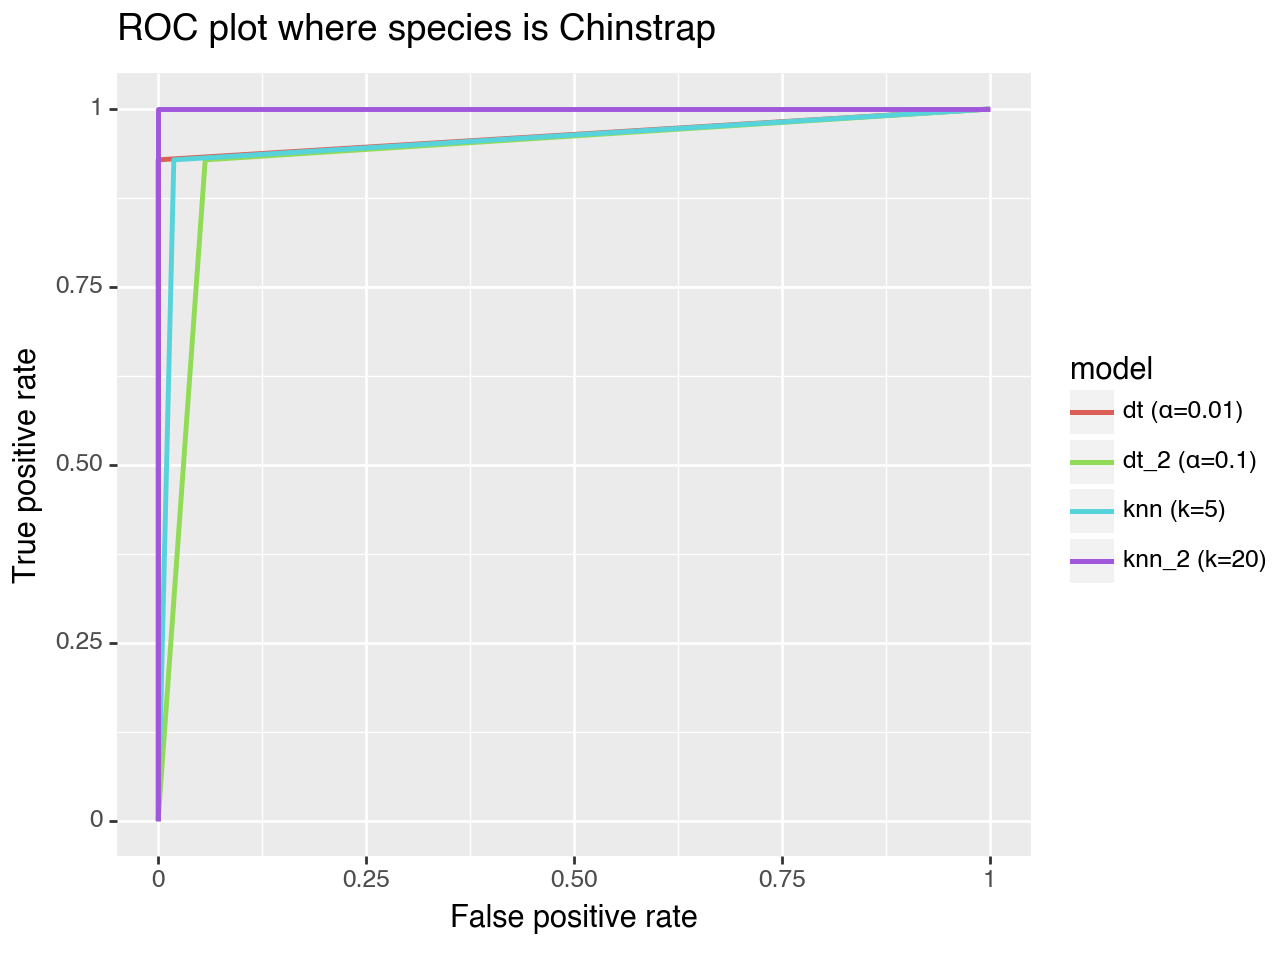

<Figure Size: (640 x 480)>

In [126]:
# Convert test data and predictions where species=="Chinstrap" to binary integers
y_test_new = (y_test == "Chinstrap").astype(int)
y_preds_knn_new = (y_preds_knn == "Chinstrap").astype(int)
y_preds_knn_2_new = (y_preds_knn_2 == "Chinstrap").astype(int)
y_preds_dt_new = (y_preds_dt == "Chinstrap").astype(int)
y_preds_dt_2_new = (y_preds_dt_2 == "Chinstrap").astype(int)

# Calculate false positive rates and true positive rates for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test_new, y_preds_knn_new)
fpr_knn_2, tpr_knn_2, _ = roc_curve(y_test_new, y_preds_knn_2_new)
fpr_dt, tpr_dt, _ = roc_curve(y_test_new, y_preds_dt_new)
fpr_dt_2, tpr_dt_2, _ = roc_curve(y_test_new, y_preds_dt_2_new)

# Make df for plot
roc_df = pd.DataFrame({"fpr": np.concatenate([fpr_knn, fpr_knn_2, fpr_dt, fpr_dt_2]), "tpr": np.concatenate([tpr_knn, tpr_knn_2, tpr_dt, tpr_dt_2]), \
                       "model": ((["knn (k=5)"] * 3) + (["knn_2 (k=20)"] * 3) + (["dt (α=0.01)"] * 3) + (["dt_2 (α=0.1)"] * 3))})
                        # all the arrays have a length of 3

# Make the actual plot
(ggplot(roc_df, aes(x="fpr", y="tpr", color="model"))
    + geom_line(size=1)
    + labs(x="False positive rate", y="True positive rate", title="ROC plot where species is Chinstrap"))